In [1]:
import pickle

# Importing training and testing data
with open('Artifacts/preprocessed_data.pkl', 'rb') as file:
    x_train = pickle.load(file)
    y_train = pickle.load(file)
    x_val = pickle.load(file)
    y_val = pickle.load(file)
    

**Task 2: Model Development - Create a Baseline CNN Model**

Designing and building a CNN architecture using convolutional layers, max pooling layers, and dense layers.

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Initialize the model
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Fourth Convolutional Block
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

# Flatten and Fully Connected Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(4, activation='softmax'))

# Print the model summary
model.summary()


/Users/sitongye/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 15, 15, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,815,428 (26.00 MB)

 Trainable params: 6,814,468 (26.00 MB)

 Non-trainable params: 960 (3.75 KB)

In [3]:
model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [12]:
history = model.fit(
    x_train,                # Training data
    y_train,                # Training labels (one-hot encoded)
    epochs=20,              # Number of epochs to train
    batch_size=8,          # Batch size
    validation_data=(x_val, y_val),  # Validation data
)

Epoch 1/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 27s 876ms/step - accuracy: 0.9297 - loss: 0.6237 - val_accuracy: 0.5968 - val_loss: 6.6170
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 26s 835ms/step - accuracy: 0.9872 - loss: 0.1377 - val_accuracy: 0.5484 - val_loss: 5.8430
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 26s 832ms/step - accuracy: 0.9684 - loss: 0.1025 - val_accuracy: 0.5484 - val_loss: 6.8333
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 25s 811ms/step - accuracy: 0.9683 - loss: 0.3762 - val_accuracy: 0.5323 - val_loss: 10.6826
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 25s 817ms/step - accuracy: 0.9818 - loss: 0.0456 - val_accuracy: 0.5645 - val_loss: 9.6630
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 28s 900ms/step - accuracy: 0.9925 - loss: 0.0631 - val_accuracy: 0.7097 - val_loss: 4.2117
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 28s 914ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 0.6774 - val_loss: 5.2016
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 27s 876ms/step - accuracy: 1.0000 - loss: 4.6670e-04 - val

In [13]:
from sklearn.metrics import f1_score
import numpy as np

# Predict on validation data
y_val_pred = model.predict(x_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

# Calculate F1 score
f1 = f1_score(y_val_true_classes, y_val_pred_classes, average='weighted')
print(f"F1 Score: {f1:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
F1 Score: 0.6568


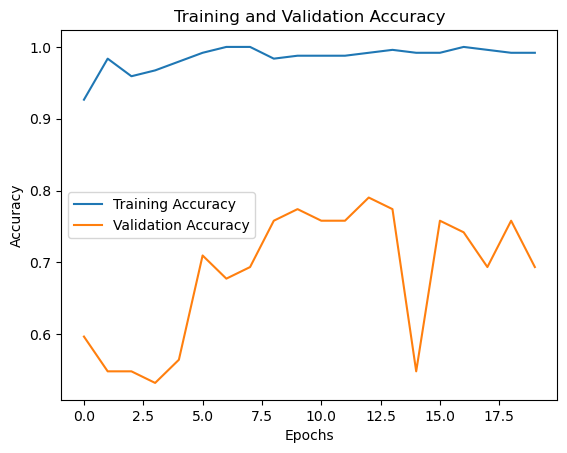

In [14]:
import matplotlib.pyplot as plt

# Plot training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

The baseline model showcases a perfect accuracy of 100% which is good while the validation accuracy is only around 70%. So, there is still room for improvement which can be improved by advancing the model with more layers or fine tuning the hyper parameters. The F1 score metric also looks good which denotes the model is not overfitting and baselined in right direction.

In [11]:
# Export baseline model

with open('Artifacts/baseline_model.pkl', 'wb') as file:
    pickle.dump(model, file)
    pickle.dump(history, file)

INFO:tensorflow:Assets written to: ram://bd8be095-2e23-453e-9155-5199d33bad67/assets


INFO:tensorflow:Assets written to: ram://bd8be095-2e23-453e-9155-5199d33bad67/assets


INFO:tensorflow:Assets written to: ram://cc896e62-90a1-4475-9ecb-e17791677c72/assets


INFO:tensorflow:Assets written to: ram://cc896e62-90a1-4475-9ecb-e17791677c72/assets
